In [1]:
import pandas as pd
df =pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


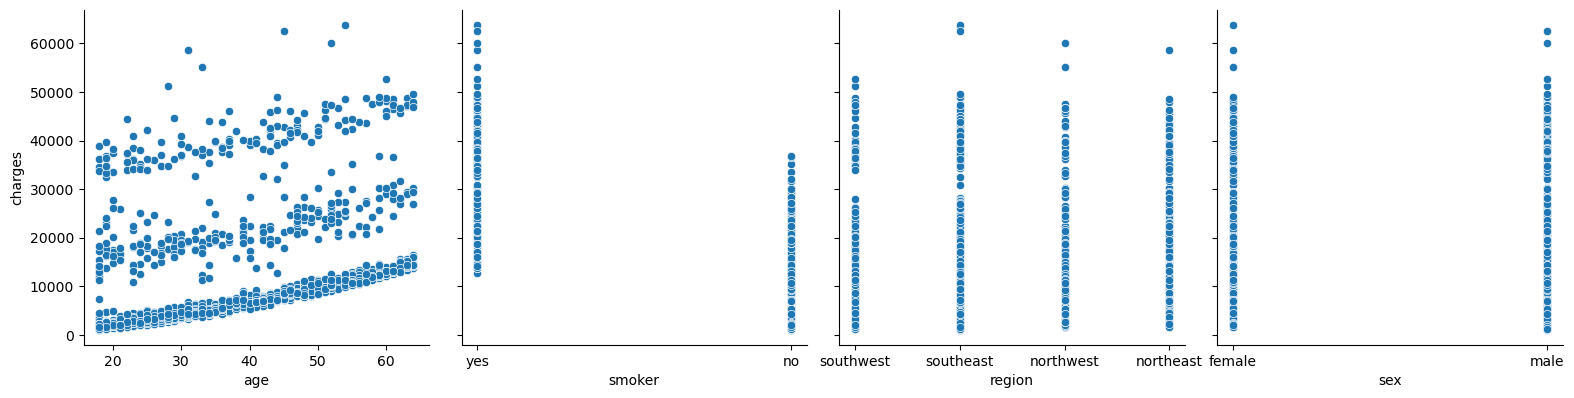

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.pairplot(
    df,
    x_vars=['age','smoker','region','sex'],
    y_vars=['charges'],
    height=4,
    aspect=1
)
plt.show()

In [4]:
x =df.iloc[:,:6]
y=df.iloc[:,6]

In [5]:
import pandas as pd
from sklearn import linear_model

# Select features and target
x = df.iloc[:, :6]
y = df.iloc[:, 6]

# Convert categorical columns to numeric
x = pd.get_dummies(x, drop_first=True)

# Train model
lr = linear_model.LinearRegression()
lr.fit(x, y)

# Show coefficients
coeffs = pd.DataFrame(lr.coef_, x.columns, columns=['Coefficient'])
coeffs

,Coefficient
age,256.856353
bmi,339.193454
children,475.500545
sex_male,-131.314359
smoker_yes,23848.534542
region_northwest,-352.963899
region_southeast,-1035.022049
region_southwest,-960.050991


In [8]:
predictions =lr.predict(x)
Scores =pd.DataFrame({'Actual': y,'Predictions':predictions})
Scores.head()

,Actual,Predictions
0,16884.92400,25293.713028
1,1725.55230,3448.602834
2,4449.46200,6706.988491
3,21984.47061,3754.830163
4,3866.85520,5592.493386


In [9]:
from sklearn import metrics
import numpy as np
print('RMSE:',np.sqrt(metrics.mean_squared_error(y,predictions)))
print('Average cost:',y.mean())
print('R-squared',metrics.r2_score(y,predictions))

RMSE: 6041.6796511744515
Average cost: 13270.422265141257
R-squared 0.7509130345985207
